# Prophet

* https://facebook.github.io/prophet/docs/installation.html#python

<a href="https://colab.research.google.com/github/fuyu-quant/Data_Science/blob/main/Time_Series_Analysis/AutoML/Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 概要
* 統計の深い知識がなくても実装できる時系列モデル
* 使い方の参考リンク  
https://www.slideshare.net/hoxo_m/prophet-facebook-76285278

In [4]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 81 kB 4.9 MB/s 
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


In [14]:
# Prophet
from prophet import Prophet

import pandas as pd
import itertools
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('/content/AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


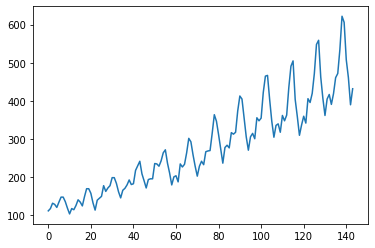

In [13]:
plt.plot(df['#Passengers'])
plt.show()

In [17]:
# Prophetでは時系列を表すカラム名をds，予測対象のカラム名をyとする必要がある
df.columns = ['ds', 'y']

In [18]:
test_length = 12
train = df.iloc[:-test_length]
test = df.iloc[-test_length:]

## Prophetの学習

In [19]:
# デフォルトの設定
params = {'growth': 'linear',     # トレンドを表す関数
          'changepoints': None,
          'n_changepoints': 25,
          'changepoint_range': 0.8,
          'yearly_seasonality': 'auto',   # 年単位の周期性を考慮するか
          'weekly_seasonality': 'auto',  # 週単位の周期性を考慮するか
          'daily_seasonality': 'auto',    # 日単位の周期性を考慮するか
          'holidays': None,
          'seasonality_mode': 'additive',
          'seasonality_prior_scale': 10.0,
          'holidays_prior_scale': 10.0,
          'changepoint_prior_scale': 0.05,
          'mcmc_samples': 0,
          'interval_width': 0.80,
          'uncertainty_samples': 1000,
          'stan_backend': None
          }

model = Prophet(**params)

model.fit(train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn9sd8yzk/igzqm58n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn9sd8yzk/p1eddcs5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=884', 'data', 'file=/tmp/tmpn9sd8yzk/igzqm58n.json', 'init=/tmp/tmpn9sd8yzk/p1eddcs5.json', 'output', 'file=/tmp/tmpn9sd8yzk/prophet_modelnl1tb292/prophet_model-20221222160117.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:01:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:01:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# Prophetの推論

In [20]:
future = model.make_future_dataframe(periods=test_length, freq='M')
pred = model.predict(future)
pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,109.098353,60.467392,109.744094,109.098353,109.098353,-23.942352,-23.942352,-23.942352,-23.942352,-23.942352,-23.942352,0.0,0.0,0.0,85.156001
1,1949-02-01,111.252770,54.910889,105.781425,111.252770,111.252770,-32.494895,-32.494895,-32.494895,-32.494895,-32.494895,-32.494895,0.0,0.0,0.0,78.757876
2,1949-03-01,113.198696,91.691525,143.089569,113.198696,113.198696,3.267491,3.267491,3.267491,3.267491,3.267491,3.267491,0.0,0.0,0.0,116.466187
3,1949-04-01,115.353113,80.261784,135.543037,115.353113,115.353113,-6.091174,-6.091174,-6.091174,-6.091174,-6.091174,-6.091174,0.0,0.0,0.0,109.261938
4,1949-05-01,117.438033,88.323385,136.985910,117.438033,117.438033,-5.266963,-5.266963,-5.266963,-5.266963,-5.266963,-5.266963,0.0,0.0,0.0,112.171070


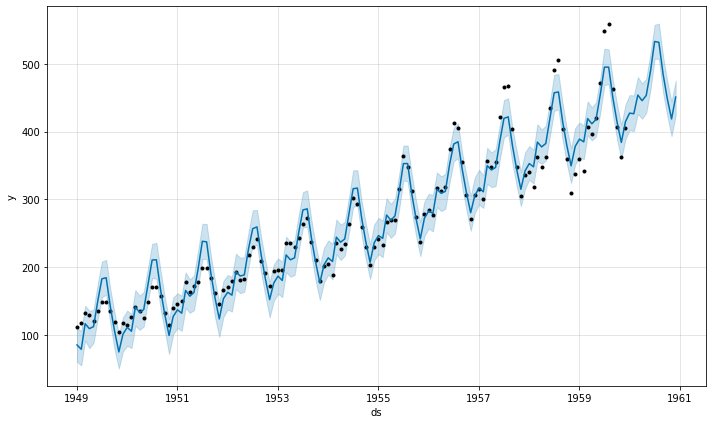

In [21]:
# 予測の出力
# 黒い点が実際のデータ
pred_plot = model.plot(pred)

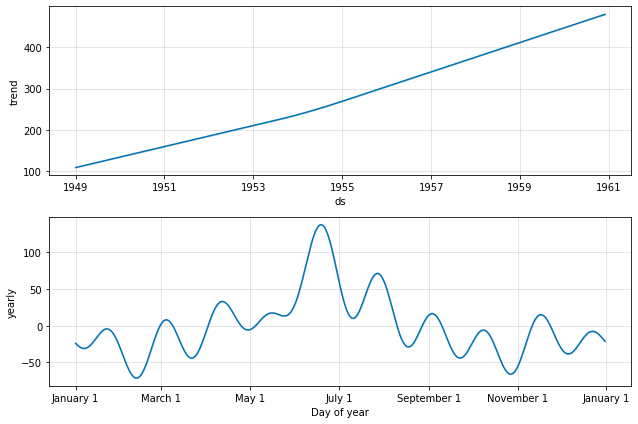

In [22]:
# トレンドと周期性の可視化
component_plot = model.plot_components(pred)

## ハイパーパラメータ探索
* https://facebook.github.io/prophet/docs/diagnostics.html#hyperparameter-tuning

In [ ]:
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# ハイパラの全ての組み合わせを作る
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df)  # Fit model with given params
    df_cv = cross_validation(m, cutoffs=cutoffs, horizon='30 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)